In [1]:
#importing libraries
import pandas as pd
import numpy as np
import io
import matplotlib. pyplot as plt
import matplotlib
%matplotlib inline
from sklearn.preprocessing import MinMaxScaler
from keras.layers import LSTM, Dense, Dropout
from sklearn.model_selection import TimeSeriesSplit
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.dates as mandates
from sklearn.preprocessing import MinMaxScaler
from sklearn import linear_model
from keras.models import Sequential
from keras.layers import Dense
import keras.backend as K
from keras.callbacks import EarlyStopping
from tensorflow.keras.optimizers import Adam
from keras.models import load_model
from keras.layers import LSTM
from keras.utils.vis_utils import plot_model

INFO:tensorflow:Enabling eager execution
INFO:tensorflow:Enabling v2 tensorshape
INFO:tensorflow:Enabling resource variables
INFO:tensorflow:Enabling tensor equality
INFO:tensorflow:Enabling control flow v2


In [2]:
df = pd.read_csv("https://raw.githubusercontent.com/mwitiderrick/stockprice/master/NSE-TATAGLOBAL.csv")
df.shape

(2035, 8)

In [3]:
df.head()

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
0,2018-09-28,234.05,235.95,230.20,233.50,233.75,3069914,7162.35
1,2018-09-27,234.55,236.80,231.10,233.80,233.25,5082859,11859.95
2,2018-09-26,240.00,240.00,232.50,235.00,234.25,2240909,5248.60
3,2018-09-25,233.30,236.75,232.00,236.25,236.10,2349368,5503.90
4,2018-09-24,233.55,239.20,230.75,234.00,233.30,3423509,7999.55


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2035 entries, 0 to 2034
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Date                  2035 non-null   object 
 1   Open                  2035 non-null   float64
 2   High                  2035 non-null   float64
 3   Low                   2035 non-null   float64
 4   Last                  2035 non-null   float64
 5   Close                 2035 non-null   float64
 6   Total Trade Quantity  2035 non-null   int64  
 7   Turnover (Lacs)       2035 non-null   float64
dtypes: float64(6), int64(1), object(1)
memory usage: 127.3+ KB


In [5]:
#checking for null values
print(df.isnull().values.any())

False


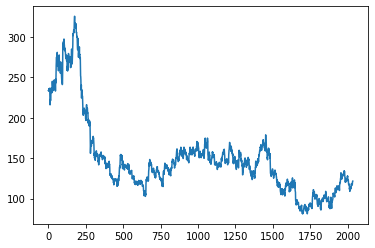

In [6]:
#Plotting the True Adjusted Close Values 
df['Close'].plot();

In [7]:
#Setting the Target Variable
output_var = pd.DataFrame(df['Close'])

In [8]:
#Selecting the Features
features = ['Open', 'High', 'Low', 'Turnover (Lacs)']

In [9]:
#Scaling Values
scaler = MinMaxScaler()
feature_transform = scaler.fit_transform(df[features])
feature_transform= pd.DataFrame(columns=features, data=feature_transform, index=df.index)
feature_transform.head()

,Open,High,Low,Turnover (Lacs)
0,0.620235,0.622688,0.621560,0.127882
1,0.622263,0.626144,0.625285,0.212192
2,0.644363,0.639154,0.631078,0.093535
3,0.617194,0.625940,0.629009,0.098117
4,0.618208,0.635902,0.623836,0.142907


In [10]:
#Training Data
timesplit= TimeSeriesSplit(n_splits=10)
for train_index, test_index in timesplit.split(feature_transform):
        X_train, X_test = feature_transform[:len(train_index)], feature_transform[len(train_index): (len(train_index)+len(test_index))]
        y_train, y_test = output_var[:len(train_index)].values.ravel(), output_var[len(train_index): (len(train_index)+len(test_index))].values.ravel()

In [11]:
# Testing Data
trainX =np.array(X_train)
testX =np.array(X_test)
X_train = trainX.reshape(X_train.shape[0], 1, X_train.shape[1])
X_test = testX.reshape(X_test.shape[0], 1, X_test.shape[1])

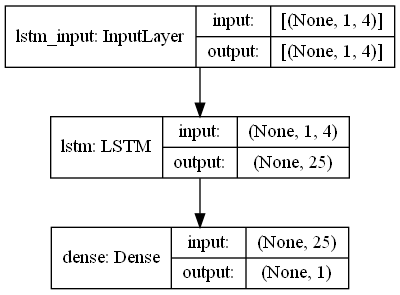

In [12]:
#processing the data for lstm
lstm = Sequential()
lstm.add(LSTM(25, input_shape=(1, trainX.shape[1]), activation='relu', return_sequences=False))
lstm.add(Dense(1))
lstm.compile(loss='mean_squared_error', optimizer='adam')
plot_model(lstm, show_shapes=True, show_layer_names=True)

In [14]:
#training the model
history = lstm.fit(X_train, y_train, epochs=100, batch_size=8, verbose=1, shuffle=False)

Epoch 1/100
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: invalid syntax (tmpbms1ek7_.py, line 48)
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: invalid syntax (tmpbms1ek7_.py, line 48)
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
232/232 [==============================] - 13s 806us/step - loss: 39848.5280
Epoch 2/100
232/232 [==============================] - 0s 778us/step - loss: 39372.1063
Epoch 3/100
232/232 [==============================] - 0s 795us/step - loss: 37650.3138
Epoch 4/100
232/232 [==============================] - 0s 795us/step - loss: 34376.6184
Epoch 5/100
232/232 [======================

In [15]:
#LSTM PREICTION
y_pred= lstm.predict(X_test)
y_pred

array([[101.87759 ],
       [102.87774 ],
       [107.151344],
       [107.45481 ],
       [105.78495 ],
       [105.23342 ],
       [101.26177 ],
       [ 98.69351 ],
       [ 97.215324],
       [ 97.098915],
       [ 97.43699 ],
       [ 97.991776],
       [ 99.15648 ],
       [ 98.41103 ],
       [ 97.72228 ],
       [ 98.19219 ],
       [ 98.42707 ],
       [ 98.026405],
       [ 97.94941 ],
       [ 99.46764 ],
       [ 99.13416 ],
       [102.3754  ],
       [ 99.36309 ],
       [ 95.94799 ],
       [ 95.60345 ],
       [ 90.6295  ],
       [ 89.36237 ],
       [ 90.58976 ],
       [ 90.87889 ],
       [ 90.21424 ],
       [ 87.91514 ],
       [ 88.55808 ],
       [ 92.51837 ],
       [ 96.01127 ],
       [ 96.25643 ],
       [ 95.16493 ],
       [ 98.72487 ],
       [ 97.32525 ],
       [ 94.999916],
       [ 94.794716],
       [ 93.02479 ],
       [ 89.44013 ],
       [ 87.25291 ],
       [ 90.726555],
       [ 94.58712 ],
       [ 96.55787 ],
       [ 95.923416],
       [ 96.1

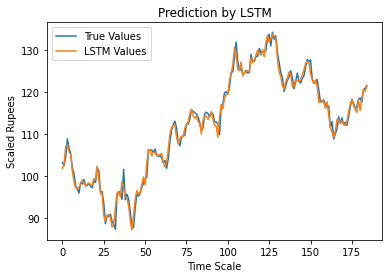

In [17]:
#True vs Predicted Close Value
plt.plot(y_test, label='True Values')
plt.plot(y_pred, label='LSTM Values')
plt.title('Prediction by LSTM')
plt.xlabel('Time Scale')
plt.ylabel('Scaled Rupees')
plt.legend()
plt.show()